# Análise Exploratória de Dados (EDA)
Este notebook é dedicado à análise exploratória dos dados fornecidos para o projeto de detecção de fraudes em entregas do Walmart. O objetivo é:
1. Entender as características de cada dataset.
2. Identificar valores ausentes, inconsistências ou anomalias.
3. Observar padrões iniciais que possam indicar fraudes ou problemas no processo de entrega.


## Importar as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

## Carregar os datasets fornecidos para a realização do projeto

In [2]:
products = pd.read_csv('https://query.data.world/s/uex6zjqbcuq7ud72jdxqzc7o6wep5d?dws=00000')
orders = pd.read_csv('https://query.data.world/s/5ncozr3rqt5jh65qzagdgm7em2fcrz?dws=00000')
missing_data = pd.read_csv('https://query.data.world/s/p3fx33f424cqnpyzida5vzyzsbq4we?dws=00000')
drivers_data = pd.read_csv('https://query.data.world/s/wg37aepfhmgkttceuo3xquslpluxd6?dws=00000')
customer_data = pd.read_csv('https://query.data.world/s/tyv2ovzlourq5ikz3pch2bmvqfk67h?dws=00000')

# Realizar EDA individual por dataset
## 1. Products
Realizar análise preliminar do dataset `product`, para garantir consistência e clareza.

### Exploração Inicial

* #### Verificar Valores Ausentes

In [3]:
products.isnull().sum()

produc_id       0
product_name    0
category        0
price           0
dtype: int64

* #### Analisar Estrutura do Dataset

In [4]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   produc_id     314 non-null    object
 1   product_name  314 non-null    object
 2   category      314 non-null    object
 3   price         314 non-null    object
dtypes: object(4)
memory usage: 9.9+ KB


* #### Corrigir Nome da Coluna

In [5]:
# Corrigir nome da primeira coluna 'produc_id' para 'product_id'
products.rename(columns={'produc_id': 'product_id'}, inplace=True)

#### Corrigir a Coluna `price`
A coluna `price` ainda está no formato `object`. Para problemas futuros precisamos corrigir isso:
* Remover o símbolo `$` e converta para `float`.

In [6]:
products['price'] = products['price'].str.replace('$', '').astype(float)

* #### Visualizar Primeiras Linhas

In [7]:
products.head()

,product_id,product_name,category,price
0,PWPX0982761090982,Kellogg's Frosties,Supermarket,12.53
1,PWPX0982761090983,Uncured Bacon,Supermarket,4.67
2,PWPX0982761090984,Whole Milk,Supermarket,9.95
3,PWPX0982761090985,Organic Bananas,Supermarket,3.94
4,PWPX0982761090986,Sourdough Bread,Supermarket,19.77


### 2. Gerar Gráficos


* #### Grafico de Distribuição de Preços

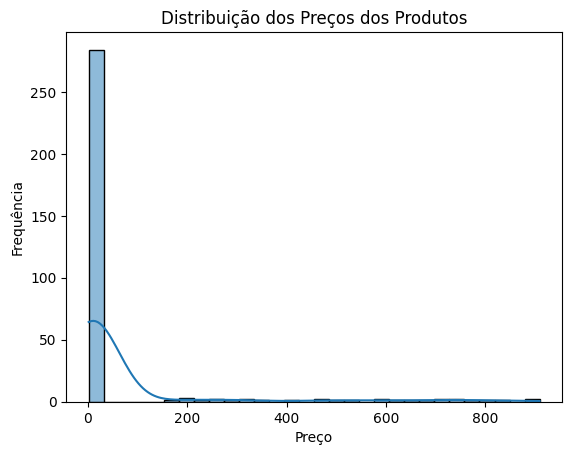

In [8]:
# Gerar gráfico de distribuição
sns.histplot(products['price'], bins=30, kde=True)
plt.title("Distribuição dos Preços dos Produtos")
plt.xlabel("Preço")
plt.ylabel("Frequência")
plt.show()

Observamos uma distribuição alta para produtos de baixo valor em comparação aos produtos com valor mais alto, vamos entender o porque:
* Realizar resumo estatistico
* Identificar outliers

In [9]:
# Resumo estatístico dos preços
print(products['price'].describe(include='all'))

count    314.000000
mean      59.129936
std      164.990844
min        2.070000
25%        7.302500
50%       11.275000
75%       17.105000
max      908.870000
Name: price, dtype: float64


In [10]:
# Identificar produtos com preços acima do percentil 95
outliers = products[products['price'] > products['price'].quantile(0.95)]
outliers

,product_id,product_name,category,price
115,PWPX0982761091097,Beats Studio Pro Headphone,Electronics,690.88
117,PWPX0982761091099,Samsung Galaxy S21,Electronics,783.07
119,PWPX0982761091101,Bose QuietComfort Earbuds,Electronics,585.52
120,PWPX0982761091102,Sony PlayStation 5,Electronics,880.38
122,PWPX0982761091104,Canon EOS Rebel Camera,Electronics,808.21
123,PWPX0982761091105,Microsoft Surface Pro,Electronics,497.46
124,PWPX0982761091106,NVIDIA GeForce RTX 3060,Electronics,647.73
127,PWPX0982761091109,GoPro Hero 9,Electronics,908.87
128,PWPX0982761091110,Kindle Paperwhite,Electronics,738.81
130,PWPX0982761091112,Apple Watch Series 6,Electronics,579.00


Esses produtos possuem preços significativamente mais altos em comparação com a maioria dos itens, que estão concentrados na categoria `Supermarket`. No entanto, os valores identificados não podem ser considerados outliers no sentido de serem erros ou anomalias, pois são consistentes com o mercado para produtos eletrônicos premium

### Visualizaçao de Possiveis Outliers

In [11]:
# Filtrar para excluir produtos da categoria 'Electronics'
filtered_products = products[products['category'] != 'Electronics']

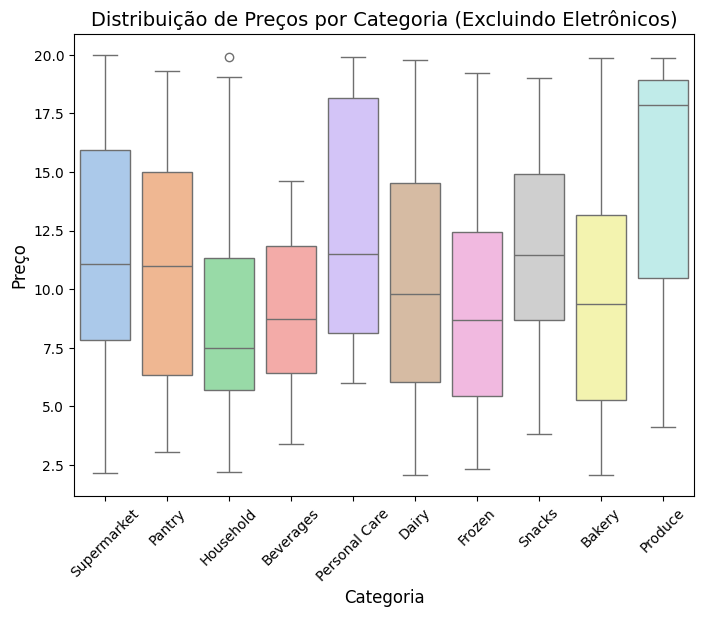

In [12]:
# Criar o boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_products, x='category', y='price', hue='category',  palette='pastel')
plt.title('Distribuição de Preços por Categoria (Excluindo Eletrônicos)', fontsize=14)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Preço', fontsize=12)
plt.xticks(rotation=45)
plt.show()

O gráfico acima mostra a distribuição de preços por categoria, excluindo os produtos da categoria `Electronics`.

* A maioria das categorias apresenta uma faixa de preços bem definida e consistente. 

Os outliers identificados serão mantidos no dataset, pois são legítimos e não comprometem a análise. Eles podem ser analisados mais detalhadamente em etapas futuras, caso necessário.

* #### Analisar Categorias de Produtos
  Explorar a coluna 'category'para entender melhor a distribuição dos produtos por categoria

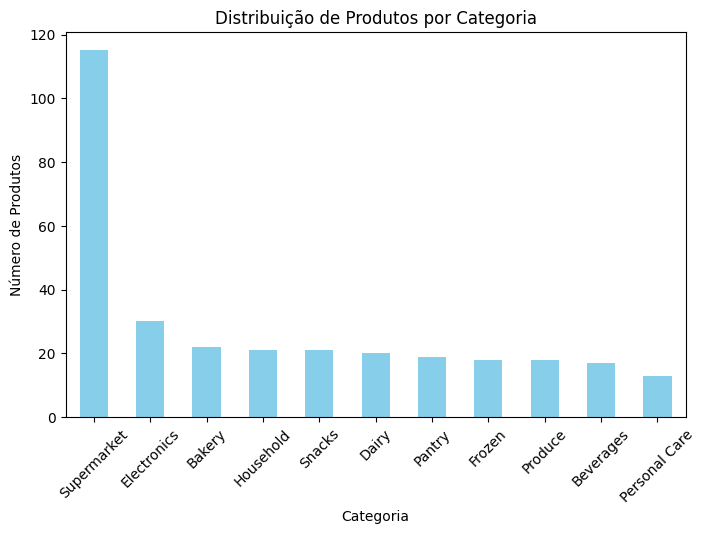

In [13]:
# Contar produtos por categoria
category_counts = products['category'].value_counts()

# Plotar gráfico de barras
category_counts.plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title("Distribuição de Produtos por Categoria")
plt.xlabel("Categoria")
plt.ylabel("Número de Produtos")
plt.xticks(rotation=45)
plt.show()

### Conclusão da Análise do Dataset `Products`

A análise exploratória do dataset `products` foi realizada com o objetivo de entender melhor as características dos produtos vendidos, como categorias, preços e possíveis outliers. Aqui estão os principais pontos abordados:

1. **Estrutura dos Dados:**
   - O dataset contém 314 produtos distribuídos em diversas categorias.
   - Não foram encontrados valores ausentes, e a coluna `price` foi convertida para o formato numérico para facilitar as análises.

2. **Distribuição de Preços:**
   - A maioria dos produtos tem preços concentrados entre `$7` e `$15`, com algumas variações entre as categorias.
   - A categoria `Supermarket` domina em quantidade de produtos, o que explica a alta frequência de itens de baixo custo.

3. **Análise de Outliers:**
   - Produtos da categoria `Electronics` apresentaram preços significativamente mais altos (ex.: "Sony PlayStation 5" e "Samsung QLED TV"), mas esses valores são legítimos e consistentes com o mercado.
   - Para uma análise mais clara, foi gerado um boxplot excluindo a categoria `Electronics`, permitindo observar melhor a distribuição de preços das demais categorias.

4. **Insights por Categoria:**
   - A categoria `Household` apresenta faixa de preço bem definida, com poucos outliers.
   - A categoria `Produce` teve os preços mais altos entre as categorias restantes.

**Decisão Final:**
Os dados do dataset `products` estão prontos para serem integrados com outros datasets no projeto. Os valores extremos identificados foram considerados legítimos e mantidos no dataset para análises futuras.


#### Sugestões
Dados que poderiam ser úteis para uma análise mais detalhada.
1. **Fragilidade dos Produtos:**
    * Classificação dos produtos quanto à fragilidade (ex.: frágil, moderado, resistente).
    * **Por quê?** Produtos frágeis podem ser mais propensos a avarias durante o transporte.
2. **Volume e Peso dos Produtos:**
    * Informações sobre o volume e peso total dos pedidos.
    * **Por quê?** Pedidos volumosos ou pesados podem ser mais difíceis de manusear, aumentando o risco de itens faltantes.

## 2. Orders

### Exploração Inicial
Realizada a análise exploratória do dataset `orders`, que contém informações sobre os pedidos realizados. 
* #### Verificar Valores Ausentes

In [14]:
orders.isnull().sum()

date               0
order_id           0
order_amount       0
region             0
items_delivered    0
items_missing      0
delivery_hour      0
driver_id          0
customer_id        0
dtype: int64

Não foram encontrados valores ausentes em nenhuma das colunas do dataset

* ### Analisar Estrutura do Dataset

In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             10000 non-null  object
 1   order_id         10000 non-null  object
 2   order_amount     10000 non-null  object
 3   region           10000 non-null  object
 4   items_delivered  10000 non-null  int64 
 5   items_missing    10000 non-null  int64 
 6   delivery_hour    10000 non-null  object
 7   driver_id        10000 non-null  object
 8   customer_id      10000 non-null  object
dtypes: int64(2), object(7)
memory usage: 703.3+ KB


Algumas colunas como `date`, `order_amount` e `delivery_hour` estão em formato `object` e precisam ser convertidas para tipos mais apropriados:
* `date` e `delivery_hour` podem ser convertidos para `datetime` .
* `order_amount` contem o simbolo `$` e precisa ser convertido para valor numérico.

* #### Converter `date` para datetime

In [16]:
orders['date'] = pd.to_datetime(orders['date'])

* #### Converter `order_amount` para float e remover simbolo `$`


In [17]:
orders['order_amount'] = orders['order_amount'].str.replace('$', '').str.replace(',', '').astype(float)

* #### Converter `delivery_hour` para timedelta (apenas hora)

In [18]:
orders['delivery_hour'] = pd.to_datetime(orders['delivery_hour'], format='%H:%M:%S').dt.time

* #### Visualizar Primeiras Linhas

In [19]:
orders.head()

,date,order_id,order_amount,region,items_delivered,items_missing,delivery_hour,driver_id,customer_id
0,2023-01-01,c9da15aa-be24-4871-92a3-dfa7746fff69,1095.54,Winter Park,10,1,08:37:28,WDID10627,WCID5031
1,2023-01-01,ccacc183-09f8-4fd5-af35-009d18656326,659.11,Altamonte Springs,11,1,09:31:17,WDID10533,WCID5794
2,2023-01-01,f4e1d30b-c3d1-413f-99b8-93c0b46d68bf,251.45,Winter Park,18,1,10:43:49,WDID10559,WCID5599
3,2023-01-01,993d31f4-9358-41f0-a371-0021e55cef5d,598.83,Altamonte Springs,12,1,09:48:33,WDID10622,WCID5005
4,2023-01-01,3e0a8f1b-3cd6-4d64-90e3-6b38dc368925,27.18,Clermont,3,1,10:09:49,WDID10654,WCID5114


### Análise Estatística

* #### Resumo Estatístico das Colunas Numéricas

In [20]:
orders[['order_amount', 'items_delivered', 'items_missing']].describe()

,order_amount,items_delivered,items_missing
count,10000.000000,10000.000000,10000.00000
mean,283.302238,9.969400,0.16570
std,181.681638,5.459693,0.41432
min,20.080000,1.000000,0.00000
25%,147.565000,5.000000,0.00000
50%,270.535000,10.000000,0.00000
75%,393.072500,15.000000,0.00000
max,1386.000000,19.000000,3.00000


#### `order_amount` (Valor do Pedido):
* **Média:** $283.30. A maioria dos pedidos tem valores moderados.

  
* **Desvio Padrão:** $181.68. Há uma grande variação nos valores dos pedidos.


* **Mínimo e Máximo:** O menor pedido é de `$20.08`, enquanto o maior é de `$1386.00`, indicando a presença de pedidos de alto valor que podem ser investigados como possíveis outliers.


#### `items_delivered` (Itens Entregues):
* **Média:** 9.97 itens por pedido.

  
* **Desvio Padrão:** 5.46. A variação no número de itens entregues é moderada.


* **Máximo:** O maior pedido contém 19 itens, o que parece razoável.


#### `items_missing` (Itens Faltantes):
* **Média:** 0.1657. A maioria dos pedidos não apresenta itens faltantes.


* **Máximo:** Até 3 itens faltantes em um único pedido, o que pode indicar problemas específicos.

#### Explorar Outliers em `order_amount`
* Usar metodo `IQR(Intervalo Quartil)` para detectar outliers nas variavéis numéricas

In [21]:
# Identificação de outliers usando IQR
for col in ['order_amount', 'items_delivered', 'items_missing']:
    Q1 = orders[col].quantile(0.25)
    Q3 = orders[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = orders[(orders[col] < lower_bound) | (orders[col] > upper_bound)]
    print(f"Outliers em {col}: {len(outliers)} registros")

Outliers em order_amount: 240 registros
Outliers em items_delivered: 0 registros
Outliers em items_missing: 1502 registros


#### Estatstica Resumidas dos Outliers

In [22]:
# Estatísticas dos outliers de order_amount
print("Resumo Estatístico dos Outliers em 'order_amount':")
print()
print(outliers.describe())
print()

# Estatísticas dos outliers de items_missing
print("\nResumo Estatístico dos Outliers em 'items_missing':")
print()
print(outliers.describe())

Resumo Estatístico dos Outliers em 'order_amount':

                                date  order_amount  items_delivered  \
count                           1502   1502.000000      1502.000000   
mean   2023-07-01 16:02:33.395472640    344.077324         9.986019   
min              2023-01-01 00:00:00     20.540000         1.000000   
25%              2023-04-05 00:00:00    161.295000         5.000000   
50%              2023-07-04 00:00:00    303.500000        10.000000   
75%              2023-09-30 00:00:00    445.735000        15.000000   
max              2023-12-31 00:00:00   1354.710000        19.000000   
std                              NaN    254.788532         5.544965   

       items_missing  
count    1502.000000  
mean        1.103196  
min         1.000000  
25%         1.000000  
50%         1.000000  
75%         1.000000  
max         3.000000  
std         0.329541  


Resumo Estatístico dos Outliers em 'items_missing':

                                date  order_am

#### Análise dos Outliers
1.	Outliers em `order_amount`:
    * Os valores altos representam pedidos legítimos de alto valor.
    * Não há evidências de erros ou inconsistências nos dados associados.
    * **Ação:** Manter os outliers.
      
&nbsp;

2.	Outliers em `items_missing`:
    * Os valores altos (até 3 itens faltantes) são plausíveis e podem indicar problemas logísticos reais.
    * Não há evidências de valores absurdos ou erros nos registros.
    * **Ação**: Manter os outliers.

### Análise Descritiva
* Verificar Distribuição das Variáveis

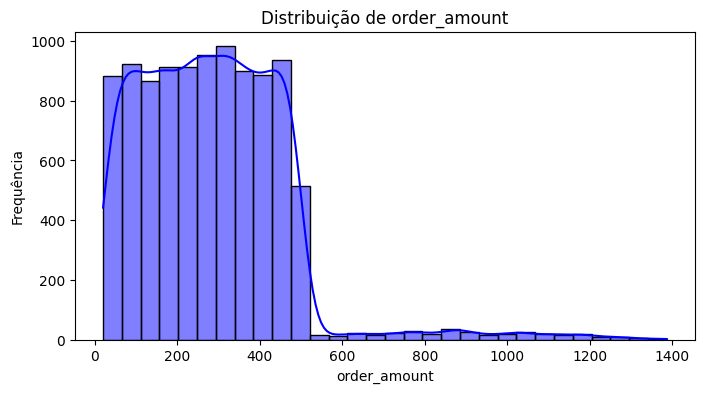

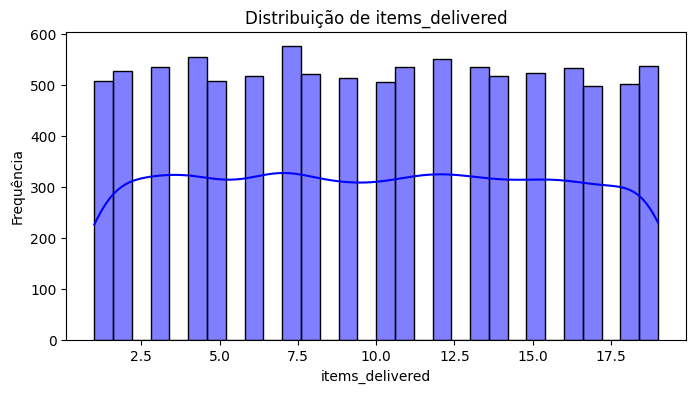

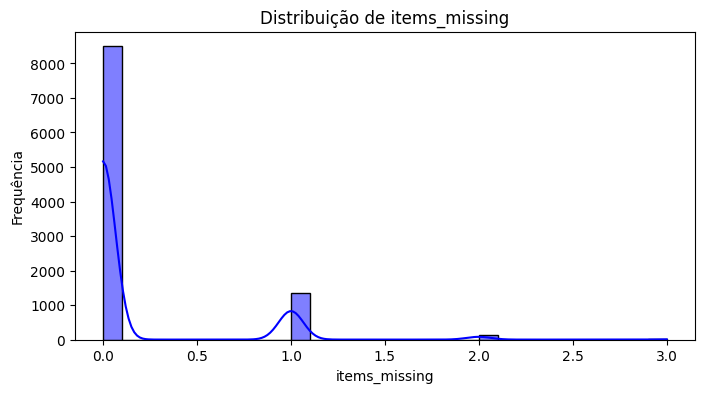

In [23]:
# Variáveis numéricas
numerical_columns = ['order_amount', 'items_delivered', 'items_missing']

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(orders[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()

#### Distribuição do Valor dos Pedidos
* A maioria dos valores de "order_amount" está concentrada entre 0 e 500, com um pico em torno de 400. Isso indica que a maioria dos pedidos tem valores nessa faixa.
* Há uma queda acentuada na frequência após 500, com muito poucos valores de pedidos excedendo 600.


#### Distribuição dos Itens Entregues
* A distribuição é assimétrica, e uma diminuição na frequência à medida que o número de itens entregues aumenta. Existem muito poucos valores excedendo 15.

#### Distribuição de Itens Perdidos
* A maioria dos valores perdidos está concentrada em torno de 0, indicando que a maioria dos pedidos tem poucos ou nenhum item perdido.
* Há um picos em torno de 1 e 2, sugerindo que alguns pedidos têm 1 item perdido.
* Existem muito poucos valores além de 2, indicando que é raro encontrar pedidos com mais de 2 itens faltantes.

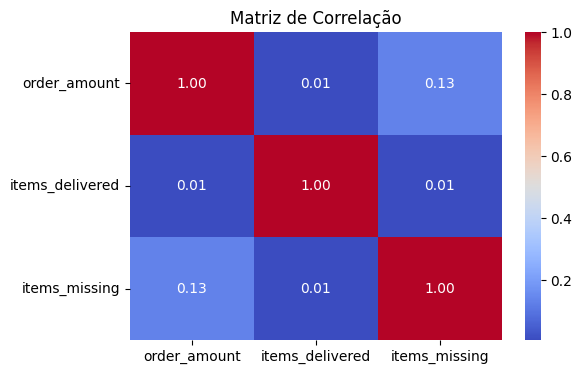

In [24]:
# Matriz de correlação
correlation_matrix = orders[['order_amount', 'items_delivered', 'items_missing']].corr()

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

* **order_amount e items_delivered (0.01)**: Há uma correlação muito fraca entre o `order_amount` e os `items_deliverd`. Isso sugere que o valor do pedido não está fortemente relacionado ao número de itens entregues.

* **order_amount e items_missing (0.13)**: Há uma correlação fraca positiva entre o `order_amount` e os `items_missing`. Isso indica que, à medida que o valor do pedido aumenta, há uma ligeira tendência de aumento no número de itens faltantes, mas essa relação não é forte.

* **items_delivered e items_missing (0.01)**: Há uma correlação muito fraca entre os `items_deliverd` e os `items_missing`. Isso sugere que o número de itens entregues não está fortemente relacionado ao número de itens faltantes.

Em resumo, as correlações entre essas variáveis são bastante fracas, indicando que não há uma relação forte entre o `valor dos pedidos`, os `itens entregues` e os `itens faltantes`.

#### Análise Regional (Pedidos por Região)
* Analisar os pedidos por região para identificar áreas com maior volume de pedidos e calcular a taxa média de itens perdidos por região.

In [25]:
# Calcular o número de pedidos por região
region_counts = orders['region'].value_counts()

# Calcular a taxa de itens faltantes por pedido
orders['missing_rate'] = orders['items_missing'] / orders['items_delivered']

# Calcular o número total de itens perdidos por região
total_missing_by_region = orders.groupby('region')['items_missing'].sum()

# Calcular a média de itens perdidos por região
mean_missing_by_region = orders.groupby('region')['items_missing'].mean()

# Calcular a taxa média de itens perdidos por região
missing_rate_by_region = orders.groupby('region')['missing_rate'].mean()

# Criar um DataFrame com os resultados
result_df = pd.DataFrame({
    'Número de Pedidos': region_counts,
    'Número Total de Itens Perdidos': total_missing_by_region,
    'Média de Itens Perdidos': mean_missing_by_region *100,
    'Taxa Média de Itens Perdidos': missing_rate_by_region *100
})


# Exibir o DataFrame resultante
result_df

,Número de Pedidos,Número Total de Itens Perdidos,Média de Itens Perdidos,Taxa Média de Itens Perdidos
region,,,,
Altamonte Springs,1426,253,17.741935,3.112516
Apopka,1422,249,17.510549,3.715102
Clermont,1384,243,17.557803,3.120694
Kissimmee,1421,219,15.411682,2.984860
Orlando,1401,233,16.630978,3.077768
Sanford,1461,225,15.400411,2.941039
Winter Park,1485,235,15.824916,2.878266


#### Visualização da Taxa Média de Itens Perdidos por Região
* Identificar quais regiões têm uma maior proporção de itens perdidos em relação ao total de itens entregues.

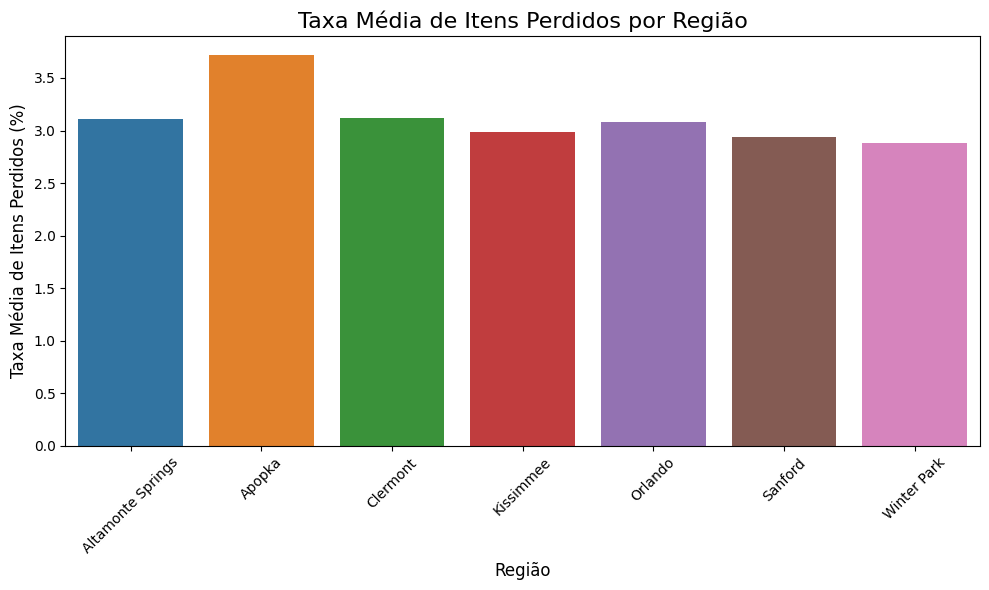

In [26]:

# Configurar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Criar o gráfico de barras para a taxa média de itens perdidos
sns.barplot(x=result_df.index, y=result_df['Taxa Média de Itens Perdidos'], hue =result_df.index)

# Personalizar o gráfico
plt.title('Taxa Média de Itens Perdidos por Região', fontsize=16)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Taxa Média de Itens Perdidos (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

* A região de Apopka apresenta a maior taxa média de itens perdidos, sugerindo que pode haver problemas específicos nessa área que precisam ser investigados e corrigidos.
* Para reduzir a taxa de itens perdidos, é importante investigar as causas específicas nas regiões com as maiores taxas e implementar medidas corretivas. Isso pode incluir treinamento adicional para os motoristas, melhorias nos processos de embalagem e entrega, ou outras ações específicas para cada região.

#### Taxa Média de Itens Faltantes por Motorista
Calcular a taxa média de itens faltantes por motorista. Isso nos ajuda a identificar quais motoristas têm uma maior proporção de itens faltantes em suas entregas.

In [27]:
# Taxa média de itens faltantes por motorista
missing_rate_by_driver = orders.groupby('driver_id')['missing_rate'].mean().sort_values(ascending=False)
print("\nTaxa Média de Itens Faltantes por Motorista:")
missing_rate_by_driver.head(10)


Taxa Média de Itens Faltantes por Motorista:


driver_id
WDID10486    0.318182
WDID09892    0.248524
WDID10318    0.243290
WDID10472    0.222727
WDID10418    0.210467
WDID10061    0.206349
WDID10519    0.205682
WDID09888    0.204545
WDID10224    0.201604
WDID10511    0.197403
Name: missing_rate, dtype: float64

* O motorista com o ID `WDID10486` tem a maior taxa média de itens faltantes, com aproximadamente 31.8%.

* Motoristas com altas taxas médias de itens faltantes podem precisar de uma investigação mais detalhada para entender as causas dos itens faltantes e implementar melhorias nos processos de entrega.

* Focar em motoristas com altas taxas de itens faltantes para identificar problemas específicos e implementar medidas corretivas, como treinamento adicional ou melhorias nos processos de embalagem e entrega.

#### Taxa Média de Itens Faltantes por Cliente
Para entender melhor a relação entre os clientes e os itens faltantes, calculamos a taxa média de itens faltantes por cliente. Isso nos ajuda a identificar quais clientes têm uma maior proporção de itens faltantes em suas entregas.

In [28]:
# Taxa média de itens faltantes por cliente
missing_rate_by_customer = orders.groupby('customer_id')['missing_rate'].mean().sort_values(ascending=False)
print("\nTaxa Média de Itens Faltantes por Cliente:")
missing_rate_by_customer.head(10)


Taxa Média de Itens Faltantes por Cliente:


customer_id
WCID5611    0.366667
WCID5227    0.343137
WCID6085    0.285714
WCID5022    0.278571
WCID5949    0.259615
WCID5748    0.250000
WCID5208    0.250000
WCID5017    0.250000
WCID5713    0.250000
WCID5743    0.225000
Name: missing_rate, dtype: float64

* O cliente com o ID `WCID5611` tem a maior taxa média de itens faltantes, com aproximadamente 36.7%.
* Clientes com altas taxas médias de itens faltantes podem precisar de uma investigação mais detalhada para entender as causas dos itens faltantes e implementar melhorias nos processos de entrega.



#### Número de Pedidos e Itens Perdidos por Mês
Para entender melhor a distribuição dos pedidos e dos itens perdidos ao longo do ano, criamos um gráfico de barras que mostra o número de pedidos e o número de itens perdidos por mês.

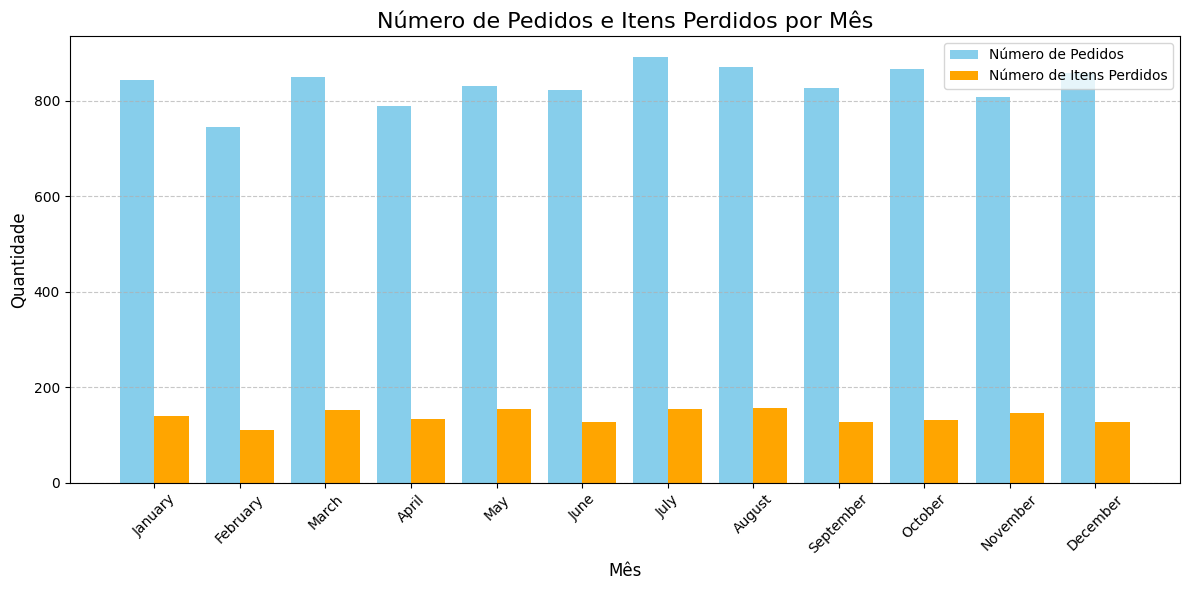

In [29]:
import calendar  # Importar o módulo calendar
import matplotlib.pyplot as plt
import seaborn as sns

# Garantir que a coluna 'date' esteja no formato datetime
orders['date'] = pd.to_datetime(orders['date'])

# Criar uma nova coluna com o nome dos meses
orders['month_name'] = orders['date'].dt.month.apply(lambda x: calendar.month_name[x])

# Número de pedidos por mês
orders_per_month = orders.groupby('month_name').size()

# Número de itens perdidos por mês
items_lost_per_month = orders.groupby('month_name')['items_missing'].sum()

# Garantir que os meses estejam em ordem cronológica
month_order = list(calendar.month_name)[1:]  # Ignorar o primeiro elemento (vazio)
orders_per_month = orders_per_month.reindex(month_order)
items_lost_per_month = items_lost_per_month.reindex(month_order)

# Criar o gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
bar_width = 0.4  # Largura de cada barra
indices = range(len(month_order))  # Índices para as barras no eixo X

# Adicionar as barras
plt.bar(indices, orders_per_month, width=bar_width, label='Número de Pedidos', color='skyblue')
plt.bar([i + bar_width for i in indices], items_lost_per_month, width=bar_width, label='Número de Itens Perdidos', color='orange')

# Personalizar o gráfico
plt.title('Número de Pedidos e Itens Perdidos por Mês', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks([i + bar_width / 2 for i in indices], month_order, rotation=45, fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

* O número de pedidos é relativamente consistente ao longo do ano, com pequenas variações mensais.
* A consistência no número de itens perdidos ao longo dos meses sugere que fatores sazonais não têm um impacto significativo nas perdas.

#### Itens Perdidos por Faixa de Tamanho do Pedido
Entender a relação entre o tamanho do pedido e a quantidade de itens perdidos em diferentes faixas de tamanho.

/var/folders/cl/xvlm11r503z804x79nzjhsbr0000gn/T/ipykernel_6457/3502033110.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = orders.groupby('items_range')['items_missing'].mean()


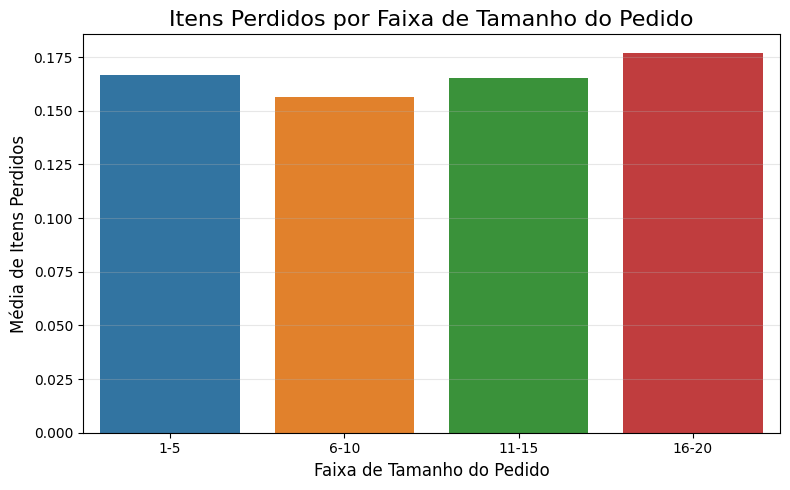

In [30]:
# Criar faixas de tamanho do pedido
orders['items_range'] = pd.cut(orders['items_delivered'], bins=[0, 5, 10, 15, 20], 
                               labels=['1-5', '6-10', '11-15', '16-20'])

# Calcular a média de itens perdidos por faixa de tamanho do pedido
grouped = orders.groupby('items_range')['items_missing'].mean()

# Criar gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=grouped.index, y=grouped.values, hue=grouped.index)

# Personalizar
plt.title('Itens Perdidos por Faixa de Tamanho do Pedido', fontsize=16)
plt.xlabel('Faixa de Tamanho do Pedido', fontsize=12)
plt.ylabel('Média de Itens Perdidos', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

* Observamos que a faixa de tamanho de pedido 16-20 tem a maior média de itens perdidos, com aproximadamente 0.175 itens perdidos em média.
* Pedidos na faixa de tamanho 16-20 têm a maior média de itens perdidos, sugerindo que pedidos de tamanho médio-alto podem estar mais propensos a perdas. Isso pode ser devido a dificuldades logísticas ou de manuseio.
* Para reduzir a quantidade de itens perdidos, é importante investigar as causas específicas das perdas em pedidos de tamanho médio-alto e implementar melhorias nos processos de embalagem e entrega.

### Relatório dataset `orders`
Realizamos uma análise exploratória detalhada do dataset `orders`, com foco em entender padrões relacionados a valores dos pedidos, itens entregues, itens faltantes e variáveis associadas a motoristas, clientes, regiões e tamanhos de pedidos.

#### Recomendações
1. **Regiões Problemáticas:**
    * Realizar auditorias logísticas na região de Apopka para identificar problemas específicos (ex.: rotas ineficientes, motoristas associados).
    * Implementar melhorias nos processos logísticos para reduzir perdas em regiões críticas.
2. **Motoristas com Altas Taxas Médias:**
    * Investigar motoristas como WDID10486 para identificar possíveis desvios ou problemas operacionais.
    * Oferecer treinamento adicional aos motoristas problemáticos para melhorar a eficiência e reduzir erros.
    * Monitorar motoristas reincidentes em reclamações e implementar auditorias regulares.
3. **Clientes com Altas Taxas Médias:**
    * Monitorar clientes como WCID5611 para verificar se há padrões consistentes que indiquem fraudes do consumidor.
    * Implementar verificações adicionais para pedidos feitos por clientes reincidentes em reclamações (ex.: confirmação fotográfica dos produtos entregues).
4. **Pedidos Maiores (16–20 Itens):**
    * Revisar os processos logísticos e de manuseio para pedidos maiores, garantindo que sejam embalados e transportados adequadamente.
    * Implementar verificações adicionais para pedidos grandes antes da entrega final.
5. **Impacto Temporal:**
    * Continuar monitorando os dados ao longo do tempo para garantir que os padrões identificados sejam consistentes e não sejam afetados por fatores sazonais futuros.

#### Sugestões
Tipos de dados que poderiam ser adicionados ao seu dataset para melhorar a qualidade das análises e permitir insights mais profundos:
1. **Condições das Entregas:**
    * Registro de avarias nos produtos entregues.
    * **Por quê?** Ajuda a identificar problemas no manuseio ou transporte.
2. **Tempo Médio de Entrega:**
    * Tempo total desde a saída do centro de distribuição até a entrega final.
    * **Por quê?** Pode indicar gargalos logísticos em determinadas rotas ou regiões.
3. **Condições Climáticas Durante as Entregas:**
    * Registro das condições climáticas (ex.: chuva, calor extremo) no momento das entregas.
    * **Por quê?** Pode influenciar diretamente na eficiência logística e na segurança das entregas.
4. **Feedback dos Clientes:**
    * Avaliação da experiência do cliente com a entrega (ex.: pontualidade, condição dos produtos).
	* **Por quê?** Pode fornecer insights qualitativos sobre os problemas enfrentados.

## 3. Missing Data

### Exploração Inicial
* #### Verificando Valores Ausentes

In [31]:
missing_data.isnull().sum()

order_id           0
product_id_1       0
product_id_2    1358
product_id_3    1483
dtype: int64

* #### Analisar Estrutura do Dataset

In [32]:
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      1501 non-null   object
 1   product_id_1  1501 non-null   object
 2   product_id_2  143 non-null    object
 3   product_id_3  18 non-null     object
dtypes: object(4)
memory usage: 47.0+ KB


* As colunas `product_id_2` e `product_id_3` possuem muitos valores ausentes, o que é esperado, pois nem todos os pedidos têm múltiplos produtos faltantes.
* Nenhuma ação de preenchimento é necessária no momento para esses valores ausentes, já que eles representam a estrutura natural dos dados.

#### Verificar Valores Unicos nas Colunas
* Realizar uma análise para verificar a quantidade de valores unicos presentes em cada coluna

In [33]:
# Verificar valores únicos em cada coluna de produtos
print("Valores únicos por coluna:")
print('order_id:', missing_data['order_id'].nunique())
print("product_id_1:", missing_data['product_id_1'].nunique())
print("product_id_2:", missing_data['product_id_2'].nunique())
print("product_id_3:", missing_data['product_id_3'].nunique())


Valores únicos por coluna:
order_id: 1501
product_id_1: 145
product_id_2: 103
product_id_3: 18


* A coluna `order_id`está limpa e sem duplicatas.
* A diversidade de produtos dimunui à medida que avançamos de `product_id_1` para `product_id_3`, o que é esperado, já que menos pedidos tem multiplos produtos faltantes  

#### Combinar Produtos Não Entregues em um Lista Unica
* Combinar todos os produtos reportados como não entregues em uma unica coluna
* Lidar com valores ausentes (`NaN`) para simplificar análises futuras.

In [34]:
# Combinar produtos não entregues em uma lista única
missing_data['products_missing'] = missing_data[['product_id_1', 'product_id_2', 'product_id_3']].apply(
    lambda row: [p for p in row if pd.notnull(p)], axis=1
)

print('Valores Ausentes')
print(missing_data[['order_id', 'products_missing']].isnull().sum()) # Verificar se existe valores nulos)

# Visualizar a nova coluna
missing_data.head()

Valores Ausentes
order_id            0
products_missing    0
dtype: int64


,order_id,product_id_1,product_id_2,product_id_3,products_missing
0,c7a343f7-3f1d-497c-8004-b9ede2d48fb1,PWPX0982761090982,PWPX0982761090982,PWPX0982761090982,"[PWPX0982761090982, PWPX0982761090982, PWPX098..."
1,20698293-8399-4fda-af1e-b61a9ebb8a0a,PWPX0982761090983,PWPX0982761090983,PWPX0982761090983,"[PWPX0982761090983, PWPX0982761090983, PWPX098..."
2,d7f690a0-c1c2-4b36-b05f-2b7e641ea1ac,PWPX0982761090984,PWPX0982761090984,PWPX0982761090984,"[PWPX0982761090984, PWPX0982761090984, PWPX098..."
3,d5cea1eb-7016-451b-9426-51973f4d6e14,PWPX0982761090985,PWPX0982761090985,PWPX0982761090985,"[PWPX0982761090985, PWPX0982761090985, PWPX098..."
4,2f7cbda8-793a-4a1d-bb66-3a514bee5dc4,PWPX0982761090986,PWPX0982761090986,PWPX0982761090986,"[PWPX0982761090986, PWPX0982761090986, PWPX098..."


* A combinação facilita a contagem do numero total de produtos não entregues por pedido e permite identificar padrões nos produtos mais frequentemente reportados como faltantes.

#### Análise Estatística 
* Contar produtos não entregues por pedido
* Resumo estatístico da contagem de produtos não entregues
  

In [35]:
# Contar o número de produtos faltantes por pedido
missing_data['num_products_missing'] = missing_data['products_missing'].apply(len)

# Resumo estatístico da contagem de produtos faltantes
missing_data['num_products_missing'].describe()

count    1501.000000
mean        1.107262
std         0.346151
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: num_products_missing, dtype: float64

* Pedidos com mais de 1 produto faltante podem indicar problemas específicos, como falhas logísticas ou operacionais em pedidos maiores.
* Pedidos com até 3 produtos faltantes são raros e podem ser analisados separadamente para identificar padrões ou anomalias.

#### Produtos Mais Frequentemente Reportados Como Faltantes
* Realizar uma análise para identificar os produtos mais frequentemente reportados como não entregues

In [36]:
from collections import Counter

# Combinar todos os produtos não entregues em uma lista única
all_missing_products = [p for products in missing_data['products_missing'] for p in products]

# Contar frequência de cada produto faltante
product_counts = Counter(all_missing_products)

# Exibir os 10 produtos mais frequentemente reportados como faltantes
print("Produtos mais frequentemente reportados como faltantes:")
product_counts.most_common(10)

Produtos mais frequentemente reportados como faltantes:


[('PWPX0982761090993', 19),
 ('PWPX0982761090997', 19),
 ('PWPX0982761090987', 18),
 ('PWPX0982761090983', 17),
 ('PWPX0982761090992', 17),
 ('PWPX0982761090994', 17),
 ('PWPX0982761091078', 17),
 ('PWPX0982761091013', 16),
 ('PWPX0982761091054', 16),
 ('PWPX0982761090982', 15)]

* Esses produtos podem ser investigados mais profundamente para identificar padrões, como categorias específicas ou regiões onde esses itens são mais frequentemente reportados.
* A frequência de cada produto foi contada utilizando a biblioteca `collections.Counter`.

### Relatório dataset `missing_data`
Realizada uma análise exploratória detalhada do dataset `missing_data`, que contém informações sobre produtos não entregues em pedidos.

#### Recomendações
1. **Auditorias Logísticas para Produtos Mais Reportados:**
    * Realizar auditorias nos processos logísticos para os produtos mais frequentemente reportados como faltantes (ex.: `'PWPX0982761090993'`, `'PWPX0982761090987'`).
    * Verificar se há padrões relacionados a motoristas, regiões ou horários específicos para esses produtos.
2.	**Monitoramento de Pedidos com Múltiplos Itens Faltantes:**
    * Implementar verificações adicionais para pedidos com mais de 1 produto faltante, pois podem estar associados a falhas operacionais recorrentes.
3.	**Melhorias no Manuseio e Embalagem:**
    * Revisar os processos de manuseio e embalagem dos produtos mais frequentemente reportados como faltantes para identificar possíveis vulnerabilidades.
4.	**Treinamento Adicional para Motoristas:**
    * Oferecer treinamento específico aos motoristas associados a pedidos com múltiplos itens faltantes para reduzir erros durante o transporte.

## 4. Drivers Data

### Exploração Inicial
* #### Verificar Valores Ausentes

In [37]:
drivers_data.isnull().sum()

driver_id      0
driver_name    0
age            0
Trips          0
dtype: int64

Não foram encontrados valores ausentes em nenhuma das colunas do dataset

* #### Analisar Estrutura do Dataset

In [38]:
drivers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driver_id    1247 non-null   object
 1   driver_name  1247 non-null   object
 2   age          1247 non-null   int64 
 3   Trips        1247 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 39.1+ KB


Os dados tipos de dados estao corretos e não é necessário realizar ajustes nos tipos de dados.

#### Visualizar Primeiras Linhas do Dataset

In [39]:
drivers_data.head()

,driver_id,driver_name,age,Trips
0,WDID09873,Pamela Moore,18,64
1,WDID09874,Billy Lawson,18,37
2,WDID09875,Stephen Randolph,18,64
3,WDID09876,Jordan Daniel,18,53
4,WDID09877,James White,18,14


#### Verificar de Valores Unicos

In [40]:
print("driver_id:", drivers_data['driver_id'].nunique())
print("driver_name:", drivers_data['driver_name'].nunique())

driver_id: 1247
driver_name: 1229


* A coluna `driver_id` está consistente e única para cada motorista.
* A coluna `driver_name` apresenta 18 nomes duplicados, o que pode indicar:
    * Motoristas diferentes que compartilham o mesmo nome (ex.: nomes comuns).
    * Possíveis duplicatas ou inconsistências nos dados.

#### Verificar Relação Entre Nomes Duplicados e IDs Unicos
* Realizar uma análise para identificar motoristas com nomes duplicados (`driver_name`) e verificar os IDs únicos (`driver_id`) associados a esses nomes.
* Entender se os nomes duplicados representam motoristas diferentes ou possíveis inconsistências nos dados.

In [41]:
# Contar os nomes duplicados
duplicated_names = drivers_data['driver_name'].value_counts()[drivers_data['driver_name'].value_counts() > 1]

# Filtrar os registros com nomes duplicados
duplicated_drivers = drivers_data[drivers_data['driver_name'].isin(duplicated_names.index)]

# Verificar a relação entre os nomes duplicados e os IDs únicos
relation = duplicated_drivers.groupby('driver_name')['driver_id'].apply(list)
print("Relação entre nomes duplicados e IDs:")
relation


Relação entre nomes duplicados e IDs:


driver_name
Ashley Brown              [WDID10398, WDID10984]
Brittany Morgan           [WDID10082, WDID10282]
Christopher Richardson    [WDID10767, WDID10786]
Daniel Hall               [WDID10222, WDID10434]
David Davis               [WDID10352, WDID11054]
Jasmine Smith             [WDID10529, WDID10286]
Jennifer Martin           [WDID10639, WDID10803]
Jennifer Miller           [WDID10613, WDID10668]
Jeremy Allen              [WDID10623, WDID10005]
Jessica Patterson         [WDID10489, WDID09991]
John Hutchinson           [WDID10635, WDID10856]
Matthew Brown             [WDID10527, WDID10147]
Michael Martin            [WDID10249, WDID10963]
Patricia Vance            [WDID10447, WDID09902]
Scott Wallace             [WDID10536, WDID11006]
Timothy Brown             [WDID10506, WDID10517]
William Brown             [WDID10645, WDID09920]
William Tucker            [WDID10775, WDID10934]
Name: driver_id, dtype: object

* #### Comparar Idade e Numero de viagens para Motoristas com Nomes Duplicados

In [42]:
# Comparar idade e número de viagens para motoristas com nomes duplicados
comparison = duplicated_drivers.groupby('driver_name')[['age', 'Trips']].apply(lambda x: x.drop_duplicates())
comparison


age  Trips
driver_name                            
Ashley Brown           828    24     72
                       1112   53     33
Brittany Morgan        48     19     60
                       740    19     76
Christopher Richardson 895    46     12
                       914    60     43
Daniel Hall            74     20     40
                       855    20     14
David Davis            792    23     50
                       1182   60     40
Jasmine Smith          209    59     66
                       744    21     74
Jennifer Martin        319    37     59
                       931    32     67
Jennifer Miller        293    29     72
                       348    61     63
Jeremy Allen           303    44     28
                       534    18     31
Jessica Patterson      169    48     24
                       520    18     35
John Hutchinson        315    35     70
                       984    64     14
Matthew Brown          207    48     68
                       632    19     39
Michael Martin         85     21     78
                       1091   29     66
Patricia Vance         139    18     40
                       431    18     38
Scott Wallace          216    63     71
                       1134   35     55
Timothy Brown          186    37     12
                       197    37     49
William Brown          325    56     48
                       449    18     29
William Tucker         903    62     33
                       1062   65     62

**Motoristas Diferentes com o Mesmo Nome:**
* Em muitos casos, os registros associados a nomes duplicados apresentam diferenças significativas em idade e/ou número de viagens.
* Isso sugere que são motoristas diferentes que compartilham o mesmo nome.

**Possíveis Duplicatas:**
* Em alguns casos (ex.: `Brittany Morgan`), os motoristas têm a mesma idade, mas números de viagens diferentes. Sem mais informações, não é possível confirmar se são duplicatas ou motoristas distintos.

**Casos Notáveis:**
* Alguns nomes (ex.: `Timothy Brown`) têm a mesma idade em ambos os registros, mas números de viagens significativamente diferentes.

#### Filtrar Motoristar com Nomes Duplicados e Mesma Idade

In [43]:
# Identificar motoristas com nomes duplicados e mesma idade
duplicates = drivers_data.groupby(['driver_name', 'age']).filter(lambda x: len(x['driver_id'].unique()) > 1)

# Obter os registros duplicados
duplicate_names = duplicates[['driver_name', 'driver_id', 'age']].drop_duplicates()
duplicate_names


,driver_name,driver_id,age
48,Brittany Morgan,WDID10082,19
74,Daniel Hall,WDID10222,20
139,Patricia Vance,WDID10447,18
186,Timothy Brown,WDID10506,37
197,Timothy Brown,WDID10517,37
431,Patricia Vance,WDID09902,18
740,Brittany Morgan,WDID10282,19
855,Daniel Hall,WDID10434,20


* **Duplicatas reais:** O mesmo motorista registrado mais de uma vez no dataset com IDs diferentes.
* **Motoristas distintos:** Pessoas diferentes que compartilham o mesmo nome e idade (possível em datasets reais, especialmente com nomes comuns).

Sem informações adicionais (ex.: endereço, número de telefone ou histórico de viagens), não é possível confirmar se são duplicatas ou registros distintos.

#### Resumo Estatistico da Idade dos Motoristas

In [44]:
drivers_data['age'].describe()

count    1247.000000
mean       34.170810
std        15.441928
min        18.000000
25%        20.000000
50%        30.000000
75%        48.000000
max        65.000000
Name: age, dtype: float64

* **Idade Mínima:** O motorista mais jovem tem 18 anos, o que pode ser esperado dado que essa é geralmente a idade mínima para dirigir.
* **Idade Máxima:** O motorista mais velho tem 65 anos.
* **Distribuição Geral:**
    * A mediana de 30 anos indica que metade dos motoristas tem até essa idade.
    * A maioria dos motoristas está concentrada entre os 20 e 48 anos (entre o primeiro e o terceiro quartil).


Não há valores extremos óbvios (outliers) fora do intervalo esperado para idades de motoristas.

#### Distribuição de Motoristas por Faixa Etária 
* Agrupar idade de motoristas em faixas etárias para facilitar análise
* Gerar gráfico de barras para visualizar o numero de motoristas em cada faixa etária

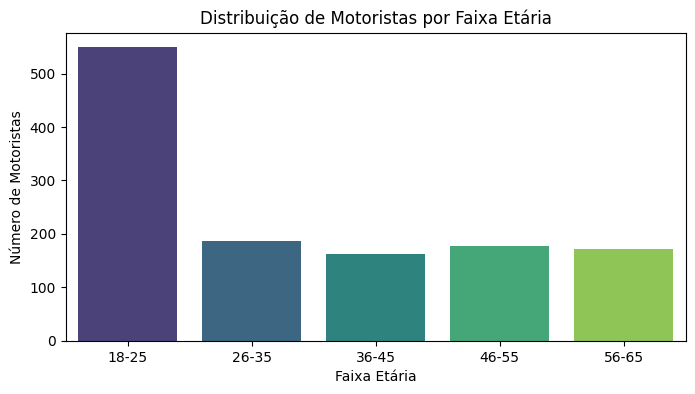

In [45]:
# Criar faixas etárias
drivers_data['age_group'] = pd.cut(drivers_data['age'], bins=[18, 25, 35, 45, 55, 65], labels=['18-25', '26-35', '36-45', '46-55', '56-65'], include_lowest=True)

# Contar motoristas por faixa etária
age_group_counts = drivers_data['age_group'].value_counts()

# Visualizar a distribuição das faixas etárias
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, hue=age_group_counts.index, palette='viridis')
plt.title('Distribuição de Motoristas por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Motoristas')
plt.show()


#### Visualizar Numero de Viagens por Faixa Etária
* Gerar boxplot para visualizar a distribuição do numero de viagens(`Trips`) realizadas pelos motoristas de cada faixa etária

/var/folders/cl/xvlm11r503z804x79nzjhsbr0000gn/T/ipykernel_6457/1328850445.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='Trips', data=drivers_data,  palette='viridis')


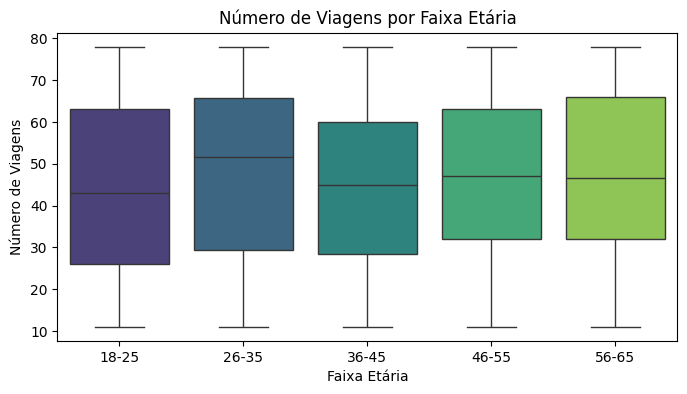

In [46]:
# Boxplot do número de viagens por faixa etária
plt.figure(figsize=(8, 4))
sns.boxplot(x='age_group', y='Trips', data=drivers_data,  palette='viridis')
plt.title('Número de Viagens por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Viagens')
plt.show()

#### Distribuição Percentual por Faixa Etária (Gráfico de Pizza)
* Gerar um grafico para visualizar distribuição percentual de mototistas por faixa etária

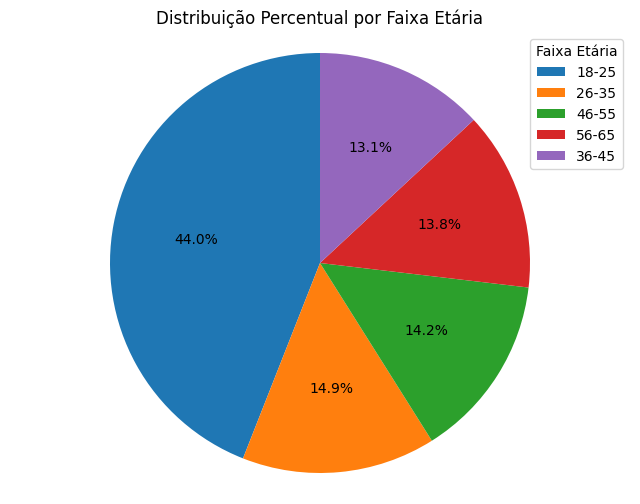

In [47]:
age_group_percentages = drivers_data['age_group'].value_counts(normalize=True) * 100

# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    age_group_percentages.values,
    labels=None,  # Remover os rótulos do gráfico
    autopct='%1.1f%%',
    startangle=90
)

# Adicionar título
plt.title('Distribuição Percentual por Faixa Etária')

# Adicionar legenda
plt.legend(wedges, age_group_percentages.index, title="Faixa Etária", loc="upper right")

# Garantir que o gráfico seja circular
plt.axis('equal')
plt.show()

* **Faixa Etária Predominante:** A faixa etária de 18-25 anos representa a maior proporção, com 44.0% do total. Isso indica que a maioria dos motoristas está nessa faixa etária.
* **Distribuição Equilibrada:** As outras faixas etárias têm porcentagens relativamente próximas, variando entre 14.9% e 13.1%, o que sugere uma distribuição equilibrada entre as diferentes faixas etárias.
* **Ações Recomendadas:** Considerar a faixa etária predominante ao planejar treinamentos e programas de desenvolvimento para os motoristas, garantindo que as necessidades específicas de cada grupo etário sejam atendidas.

#### Resumo Estatistico do Numero de Viagens
* Gerar resumo estatistico de numero de viagens realizadas por motoristas.
* Criar gráfico para visualizar a distribuição do numero de viagens e identificar possiveis outliers.

count    1247.000000
mean       45.665597
std        19.747758
min        11.000000
25%        28.500000
50%        46.000000
75%        63.000000
max        78.000000
Name: Trips, dtype: float64


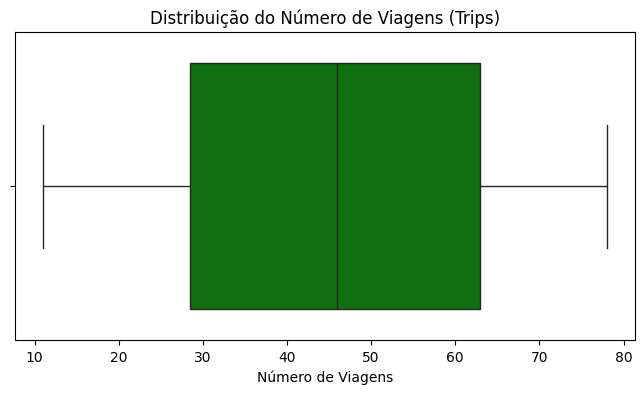

In [48]:
# Resumo estatístico do número de viagens
print(drivers_data['Trips'].describe())

# Boxplot para identificar outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=drivers_data['Trips'], color='green')
plt.title('Distribuição do Número de Viagens (Trips)')
plt.xlabel('Número de Viagens')
plt.show()


* A distribuição do número de viagens é relativamente simétrica, com a maioria dos motoristas realizando entre 28.5 e 63 viagens.

* A ausência de outliers sugere que não há motoristas com um número de viagens excepcionalmente alto ou baixo, o que pode indicar uma distribuição equilibrada de trabalho entre os motoristas.

#### Correlação Entre Idade e Número de Viagens
* Calcular a correlação entre as variáveis `age` (idade) e `Trips` (número de viagens) para verificar se há uma relação significativa entre elas.

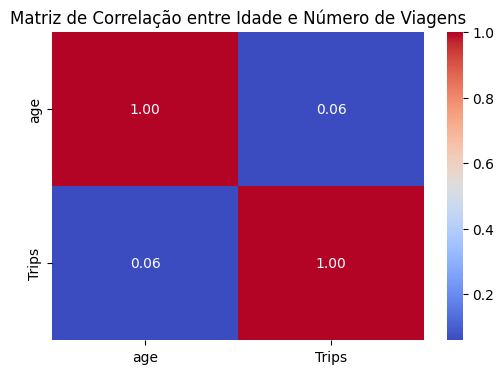

In [49]:
# Calcular correlação entre idade e número de viagens
correlation = drivers_data[['age', 'Trips']].corr()
# Criar o heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriz de Correlação entre Idade e Número de Viagens')
plt.show()



* A correlação entre idade e número de viagens é muito fraca, com um valor próximo de zero.
* Não há uma relação significativa entre a idade dos motoristas e o número de viagens que eles realizam.
* Isso sugere que a idade não é um fator determinante para a quantidade de viagens realizadas pelos motoristas.

### Relatorio dataset `drivers_data`
Realizada uma análise exploratória detalhada do dataset `drivers_data`, que contém informações sobre os motoristas, incluindo seus IDs, nomes, idades e número de viagens realizadas.

#### Recomendações
1. **Verificação de Dados Duplicados:**
    * Realizar uma auditoria nos registros dos motoristas com nomes duplicados para confirmar se são pessoas diferentes ou duplicatas reais.
    * Caso sejam duplicatas reais, consolidar os registros para evitar inconsistências futuras.
2.	**Treinamento Personalizado por Faixa Etária:**
    * Desenvolver programas específicos para atender às necessidades da faixa etária predominante (18–25 anos), como:
    * Treinamento em habilidades operacionais básicas.
    * Incentivos para retenção a longo prazo.
    * Criar programas voltados para motoristas mais experientes (ex.: mentorias ou incentivos financeiros).
3.	**Monitoramento Contínuo do Número de Viagens:**
    * Continuar monitorando a distribuição do número de viagens para garantir que o trabalho permaneça equilibrado entre os motoristas.
    * Investigar casos onde motoristas realizem consistentemente menos viagens para identificar possíveis problemas (ex.: indisponibilidade ou rotas ineficientes).
4.	**Foco em Fatores Operacionais Relevantes:**
    * Como a idade não está correlacionada ao número de viagens, priorizar a análise de outros fatores operacionais (ex.: rotas atribuídas, regiões atendidas) para otimizar o desempenho dos motoristas.
Pontos Fortes da Análise

#### Sugestões
Tipos de dados que poderiam ser adicionados ao seu dataset para melhorar a qualidade das análises e permitir insights mais profundos:

1. **Feedback dos Clientes:**
    * Avaliação da experiência do cliente com a entrega (ex.: pontualidade, condição dos produtos).
	* **Por quê?** Pode fornecer insights qualitativos sobre os problemas enfrentados.

## 5. Customer Data

### Exploração Inicial
#### Verificar Valores Ausentes

In [50]:
customer_data.isnull().sum()

customer_id      0
customer_name    0
customer_age     0
dtype: int64

Não foram encontrados valores ausentes em nenhuma das colunas do dataset

#### Analisar Estrutura do Dataset

In [51]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1239 entries, 0 to 1238
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1239 non-null   object
 1   customer_name  1239 non-null   object
 2   customer_age   1239 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 29.2+ KB


Os dados tipos de dados estao corretos e não é necessário realizar ajustes nos tipos de dados.

#### Visualizar Primeiras Linhas do Dataset

In [52]:
customer_data.head(10)

,customer_id,customer_name,customer_age
0,WCID5170,Elijah Taylor,30
1,WCID5901,Alexis Ross,58
2,WCID5652,Carla Knox,23
3,WCID5578,Matthew Beard,61
4,WCID5905,Julie Reese,80
5,WCID5218,William Bryan,73
6,WCID5625,Alex Berry,74
7,WCID5165,David Mccoy,59
8,WCID5018,Mark Mcmahon,78
9,WCID5857,Douglas Roth,81


#### Verificar Valores Unicos

In [53]:
print("customer_id:", customer_data['customer_id'].nunique())
print("customer_name:", customer_data['customer_name'].nunique())

customer_id: 1239
customer_name: 1230


* A coluna `customer_id` está consistente e única para cada cliente.
* A coluna `customer_name` apresenta 9 nomes duplicados, o que pode indicar:
    * Clientes diferentes que compartilham o mesmo nome (ex.: nomes comuns).
    * Possíveis duplicatas ou inconsistências nos dados.

#### Verificar Relação Entre Nomes Duplicados e IDs Unicos
* Realizar uma análise para identificar clientes com nomes duplicados (`customer_name`) e verificar os IDs únicos (`customer_id`) associados a esses nomes.
* Entender se os nomes duplicados representam clientes diferentes ou possíveis inconsistências nos dados.

In [54]:
# Contar os nomes duplicados
duplicated_customer_names = customer_data['customer_name'].value_counts()[customer_data['customer_name'].value_counts() > 1]

# Filtrar os registros com nomes duplicados
duplicated_customer = customer_data[customer_data['customer_name'].isin(duplicated_customer_names.index)]

# Verificar a relação entre os nomes duplicados e os IDs únicos
relation_customer = duplicated_customer.groupby('customer_name')['customer_id'].apply(list)
print("Relação entre nomes duplicados e IDs:")
relation_customer

Relação entre nomes duplicados e IDs:


customer_name
Angela Smith         [WCID5836, WCID5659]
Christine Garcia     [WCID5328, WCID5749]
David Wilson         [WCID6012, WCID5558]
James Johnson        [WCID5791, WCID5324]
John Bell            [WCID5442, WCID5617]
John Williams        [WCID5209, WCID5373]
Justin Hill          [WCID5196, WCID5822]
Kimberly Gonzalez    [WCID5786, WCID5966]
Sharon Allen         [WCID5729, WCID5903]
Name: customer_id, dtype: object

* Identificamos nomes duplicados com IDs diferentes

#### Comparar Idade com Nomes Duplicados

In [55]:
# Comparar idade com nomes duplicados
comparison_customer = duplicated_customer.groupby('customer_name')[['customer_age']].apply(lambda x: x.drop_duplicates())
comparison_customer

customer_age
customer_name                       
Angela Smith      299             24
                  654             81
Christine Garcia  500             68
                  919             66
David Wilson      868             77
                  1067            46
James Johnson     122             51
                  775             62
John Bell         690             34
                  1013            64
John Williams     560             68
                  1031            29
Justin Hill       511             39
                  898             23
Kimberly Gonzalez 314             32
                  322             49
Sharon Allen      203             45
                  817             34

**Clientes Diferentes com o Mesmo Nome:**
* Em muitos casos, os registros associados a nomes duplicados apresentam diferenças significativas em idade e/ou número de viagens.
* Isso sugere que são clientes diferentes que compartilham o mesmo nome.


#### Resumo Estatistico da Idade dos Clientes

In [56]:
customer_data['customer_age'].describe()

count    1239.000000
mean       54.421308
std        20.911501
min        18.000000
25%        36.000000
50%        55.000000
75%        73.000000
max        90.000000
Name: customer_age, dtype: float64

* A distribuição da idade dos clientes é ampla, variando de 18 a 90 anos.
* A idade média e a mediana são próximas, sugerindo uma distribuição relativamente simétrica.
* O desvio padrão indica uma variabilidade considerável nas idades dos clientes, com uma faixa etária ampla.

#### Distribuição de Clientes por Faixa Etária 
* Agrupar idade de clientes em faixas etárias para facilitar análise
* Gerar gráfico de barras para visualizar o numero de clientes em cada faixa etária

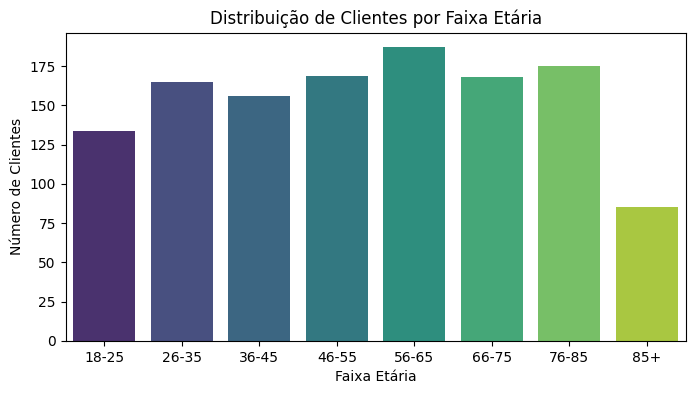

In [57]:
# Criar faixas etárias
customer_data['age_group'] = pd.cut(customer_data['customer_age'], bins=[18, 25, 35, 45, 55, 65, 75, 85, 90], labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '85+'], include_lowest=True)

# Contar motoristas por faixa etária
customer_age_group_counts = customer_data['age_group'].value_counts()

# Visualizar a distribuição das faixas etárias
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.barplot(x=customer_age_group_counts.index, y=customer_age_group_counts.values, hue=customer_age_group_counts.index, palette='viridis')
plt.title('Distribuição de Clientes por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Clientes')
plt.show()


#### Distribuição Percentual por Faixa Etária (Gráfico de Pizza)
* Gerar um grafico para visualizar distribuição percentual de clientes por faixa etária

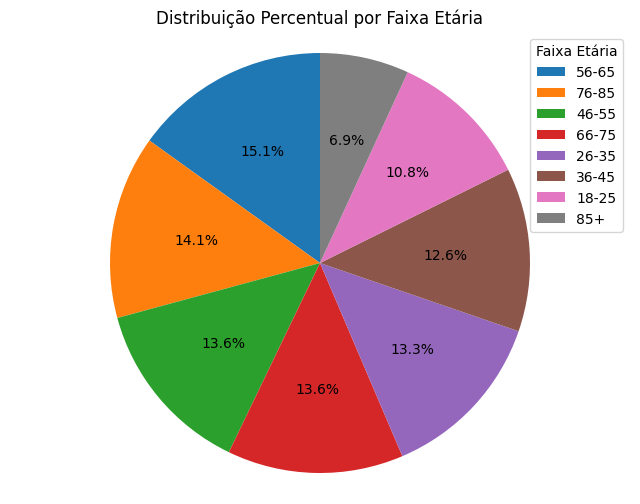

In [58]:
customer_age_group_percentages = customer_data['age_group'].value_counts(normalize=True) * 100

# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    customer_age_group_percentages.values,
    labels=None,  # Remover os rótulos do gráfico
    autopct='%1.1f%%',
    startangle=90
)

# Adicionar título
plt.title('Distribuição Percentual por Faixa Etária')

# Adicionar legenda
plt.legend(wedges, customer_age_group_percentages.index, title="Faixa Etária", loc="upper right")

# Garantir que o gráfico seja circular
plt.axis('equal')
plt.show()


**Faixa Etária Predominante:** A faixa etária de 56-65 anos representa a maior proporção, com 15.1% do total. Isso pode indicar que a maioria dos clientes está nessa faixa etária.

**Distribuição Equilibrada:** As outras faixas etárias têm porcentagens relativamente próximas, variando entre 10.8% e 14.1%, o que sugere uma distribuição equilibrada entre as diferentes faixas etárias.

**Menor Proporção:** A faixa etária de 85+ anos tem a menor proporção, com 6.9%, o que pode indicar uma menor presença de clientes nessa faixa etária.

Esses insights podem ser úteis para entender a composição etária da população e para planejar estratégias de marketing e atendimento ao cliente direcionadas a diferentes grupos etários.

### Relatório dataset `customer_data`
Realizada uma análise exploratória detalhada do dataset `customer_data`, que contém informações sobre os clientes, incluindo IDs, nomes e idades.

#### Recomendações
1. **Verificação de Dados Duplicados:**
    * Realizar uma auditoria nos registros dos clientes com nomes duplicados para confirmar se são pessoas diferentes ou duplicatas reais.
    * Caso sejam duplicatas reais, consolidar os registros para evitar inconsistências futuras.
2.	**Segmentação por Faixa Etária:**
    * Criar estratégias específicas para atender às necessidades dos diferentes grupos etários:
    * Para os clientes mais jovens (18–25 anos): Oferecer promoções ou programas de fidelidade voltados para produtos populares entre esse público.
    * Para os clientes mais velhos (56–65 anos ou mais): Garantir um atendimento personalizado e priorizar produtos voltados para saúde e bem-estar.
3.	**Monitoramento Contínuo:**
    * Continuar monitorando as características demográficas dos clientes para garantir que as estratégias estejam alinhadas com as necessidades da base de clientes.
4.	**Pesquisas Qualitativas:**
    * Realizar pesquisas qualitativas com os grupos etários predominantes (ex.: 56–65 anos) para entender melhor suas preferências e desafios relacionados às entregas

### Sugestões
Tipos de dados que poderiam ser adicionados ao seu dataset para melhorar a qualidade das análises e permitir insights mais profundos:
1. **Histórico de Reclamações por Cliente:**
    * Número total de reclamações feitas por cliente.
    * **Por quê?** Ajuda a identificar clientes reincidentes que podem estar abusando do sistema (fraudes do consumidor).
2. **Feedback dos Clientes:**
    * Avaliação da experiência do cliente com a entrega (ex.: pontualidade, condição dos produtos).
    * **Por quê?** Pode fornecer insights qualitativos sobre os problemas enfrentados.

## Salvar datasets limpos no EDA Notebook

In [59]:
# Salvar datasets limpos no EDA Notebook
drivers_data.to_csv('drivers_data_cleaned.csv', index=False)
orders.to_csv('orders_cleaned.csv', index=False)
missing_data.to_csv('missing_data_cleaned.csv', index=False)
products.to_csv('products_cleaned.csv', index=False)
customer_data.to_csv('customer_data_cleaned.csv', index=False)